## Recommendation System

Data Description:

Unique ID of each anime.
Anime title.
Anime broadcast type, such as TV, OVA, etc.
anime genre.
The number of episodes of each anime.
The average rating for each anime compared to the number of users who gave ratings.


Number of community members for each anime.
Objective:
The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset. 
Dataset:
Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

Tasks:

Data Preprocessing:

Load the dataset into a suitable data structure (e.g., pandas DataFrame).
Handle missing values, if any.
Explore the dataset to understand its structure and attributes.

Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
Convert categorical features into numerical representations if necessary.
Normalize numerical features if required.

Recommendation System:

Design a function to recommend anime based on cosine similarity.
Given a target anime, recommend a list of similar anime based on cosine similarity scores.
Experiment with different threshold values for similarity scores to adjust the recommendation list size.

Evaluation:

Split the dataset into training and testing sets.
Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.
Analyze the performance of the recommendation system and identify areas of improvement.

Interview Questions:
1. Can you explain the difference between user-based and item-based collaborative filtering?
2. What is collaborative filtering, and how does it work?

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('anime.csv')

## Data Preprocessing:

Load the dataset into a suitable data structure (e.g., pandas DataFrame).
Handle missing values, if any.
Explore the dataset to understand its structure and attributes.


In [39]:
df

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3                                       Sci-Fi, Thriller     TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
...                                                  ...    ...      ...   
12289                                             Hentai    OVA        1   
12290                                             Hentai    OVA        1   
12291                                             Hentai    OVA        4   
12292                                             Hentai    OVA        1   
12293                                             Hentai  Movie        1   

       rating  members  
0        9.37   200630  
1        9.26   793665  
2        9.25   114262  
3        9.17   673572  
4        9.16   151266  
...       ...      ...  
12289    4.15      211  
12290    4.28      183  
12291    4.88      219  
12292    4.98      175  
12293    5.46      142  

[12294 rows x 7 columns]

In [40]:
df.shape

(12294, 7)

In [41]:
df.duplicated().sum()

0

In [42]:
df.describe()

anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06

In [43]:
df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [44]:
df['rating'].unique()

array([ 9.37,  9.26,  9.25,  9.17,  9.16,  9.15,  9.13,  9.11,  9.1 ,
        9.06,  9.05,  9.04,  8.98,  8.93,  8.92,  8.88,  8.84,  8.83,
        8.82,  8.81,  8.8 ,  8.78,  8.77,  8.76,  8.75,  8.74,  8.73,
        8.72,  8.71,  8.69,  8.68,  8.67,  8.66,  8.65,  8.64,  8.62,
        8.61,  8.6 ,  8.59,  8.58,  8.57,  8.56,  8.55,  8.54,  8.53,
        8.52,  8.51,  8.5 ,  8.49,  8.48,  8.47,  8.46,  8.45,  8.44,
        8.43,  8.42,  8.41,  8.4 ,  8.39,  8.38,  8.37,  8.36,  8.35,
        8.34,  8.33,  8.32,  8.31,  8.3 ,  8.29,  8.28,  8.27,  8.26,
        8.25,  8.24,  8.23,  8.22,  8.21,  8.2 ,  8.19,  8.18,  8.17,
        8.16,  8.15,  8.14,  8.13,  8.12,  8.11,  8.1 ,  8.09,  8.08,
        8.07,  8.06,  8.05,  8.04,  8.03,  8.02,  8.01,  8.  ,  7.99,
        7.98,  7.97,  7.96,  7.95,  7.94,  7.93,  7.92,  7.91,  7.9 ,
        7.89,  7.88,  7.87,  7.86,  7.85,  7.84,  7.83,  7.82,  7.81,
        7.8 ,  7.79,  7.78,  7.77,  7.76,  7.75,  7.74,  7.73,  7.72,
        7.71,  7.7 ,

In [45]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [46]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [47]:
df['episodes'] = pd.to_numeric(df['episodes'], errors= 'coerce')

In [48]:
df['episodes']= df['episodes'].fillna(df['episodes'].median())

In [49]:
df['episodes'].unique()

array([1.000e+00, 6.400e+01, 5.100e+01, 2.400e+01, 1.000e+01, 1.480e+02,
       1.100e+02, 1.300e+01, 2.010e+02, 2.500e+01, 2.200e+01, 7.500e+01,
       4.000e+00, 2.600e+01, 1.200e+01, 2.700e+01, 4.300e+01, 7.400e+01,
       3.700e+01, 2.000e+00, 1.100e+01, 9.900e+01, 3.900e+01, 1.010e+02,
       4.700e+01, 5.000e+01, 6.200e+01, 3.300e+01, 1.120e+02, 2.300e+01,
       3.000e+00, 9.400e+01, 6.000e+00, 8.000e+00, 1.400e+01, 7.000e+00,
       4.000e+01, 1.500e+01, 2.030e+02, 7.700e+01, 2.910e+02, 1.200e+02,
       1.020e+02, 9.600e+01, 3.800e+01, 7.900e+01, 1.750e+02, 1.030e+02,
       7.000e+01, 1.530e+02, 4.500e+01, 5.000e+00, 2.100e+01, 6.300e+01,
       5.200e+01, 2.800e+01, 1.450e+02, 3.600e+01, 6.900e+01, 6.000e+01,
       1.780e+02, 1.140e+02, 3.500e+01, 6.100e+01, 3.400e+01, 1.090e+02,
       2.000e+01, 9.000e+00, 4.900e+01, 3.660e+02, 9.700e+01, 4.800e+01,
       7.800e+01, 3.580e+02, 1.550e+02, 1.040e+02, 1.130e+02, 5.400e+01,
       1.670e+02, 1.610e+02, 4.200e+01, 1.420e+02, 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  float64
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 672.5+ KB


In [50]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [51]:
for i in df.isna().sum():
    print(round(i/len(df)*100,2),'%')

0.0 %
0.0 %
0.5 %
0.2 %
0.0 %
1.87 %
0.0 %


In [52]:
df = df.dropna()

In [54]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [55]:
df['genre'].value_counts().head()

genre
Hentai                   816
Comedy                   521
Music                    297
Kids                     197
Comedy, Slice of Life    174
Name: count, dtype: int64

<Axes: >

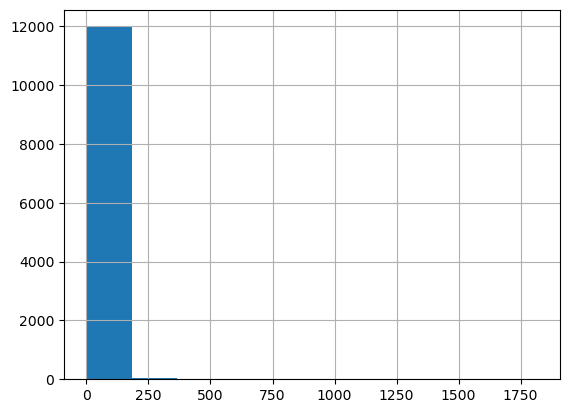

In [56]:
df['episodes'].hist(bins= 10)

<Axes: xlabel='rating', ylabel='count'>

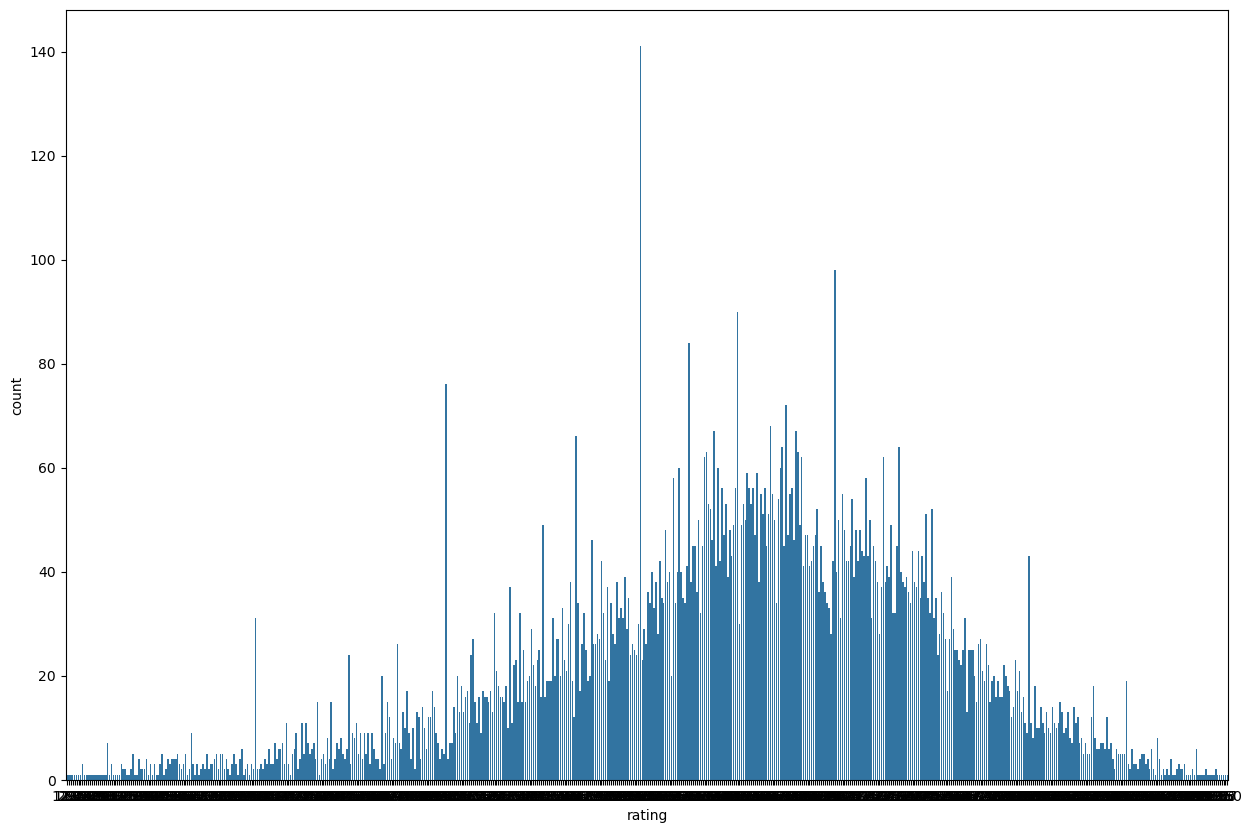

In [57]:
plt.figure(figsize = (15,10))
sns.countplot(x = df['rating'])

## Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
Convert categorical features into numerical representations if necessary.
Normalize numerical features if required.


In [58]:
df['genre']= df['genre'].fillna('')

C:\Users\Asad\AppData\Local\Temp\ipykernel_12588\675713942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre']= df['genre'].fillna('')


In [59]:
df['genre_list'] = df['genre'].apply(lambda x:x.split(','))

C:\Users\Asad\AppData\Local\Temp\ipykernel_12588\218834369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_list'] = df['genre'].apply(lambda x:x.split(','))


In [60]:
df['genre_list']

0                [Drama,  Romance,  School,  Supernatural]
1        [Action,  Adventure,  Drama,  Fantasy,  Magic,...
2        [Action,  Comedy,  Historical,  Parody,  Samur...
3                                      [Sci-Fi,  Thriller]
4        [Action,  Comedy,  Historical,  Parody,  Samur...
                               ...                        
12289                                             [Hentai]
12290                                             [Hentai]
12291                                             [Hentai]
12292                                             [Hentai]
12293                                             [Hentai]
Name: genre_list, Length: 12017, dtype: object

In [61]:
# we will use multilabelbinarizer becoz the genre columns are seperated by commas 

from sklearn.preprocessing import MultiLabelBinarizer


mlb = MultiLabelBinarizer()
genre_encode =mlb.fit_transform(df['genre_list'])

genre_df = pd.DataFrame(genre_encode, columns= mlb.classes, index= df.index)
df_encoded = pd.concat([df, genre_df], axis= 1)

In [62]:
df_encoded

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type  episodes  \
0                   Drama, Romance, School, Supernatural  Movie       1.0   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV      64.0   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0   
3                                       Sci-Fi, Thriller     TV      24.0   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0   
...                                                  ...    ...       ...   
12289                                             Hentai    OVA       1.0   
12290                                             Hentai    OVA       1.0   
12291                                             Hentai    OVA       4.0   
12292                                             Hentai    OVA       1.0   
12293                                             Hentai  Movie       1.0   

       rating  members                                         genre_list  0  \
0        9.37   200630          [Drama,  Romance,  School,  Supernatural]  0   
1        9.26   793665  [Action,  Adventure,  Drama,  Fantasy,  Magic,...  1   
2        9.25   114262  [Action,  Comedy,  Historical,  Parody,  Samur...  0   
3        9.17   673572                                [Sci-Fi,  Thriller]  0   
4        9.16   151266  [Action,  Comedy,  Historical,  Parody,  Samur...  0   
...       ...      ...                                                ... ..   
12289    4.15      211                                           [Hentai]  0   
12290    4.28      183                                           [Hentai]  0   
12291    4.88      219                                           [Hentai]  0   
12292    4.98      175                                           [Hentai]  0   
12293    5.46      142                                           [Hentai]  0   

       1  ...  72  73  74  75  76  77  78  79  80  81  
0      0  ...   0   0   0   0   0   0   0   0   0   0  
1      0  ...   0   0   0   0   0   0   0   0   0   0  
2      0  ...   0   0   0   0   0   0   0   0   0   0  
3      0  ...   0   0   0   0   0   0   0   0   0   0  
4      0  ...   0   0   0   0   0   0   0   0   0   0  
...   ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
12289  0  ...   0   0   0   0   0   0   0   0   0   0  
12290  0  ...   0   0   0   0   0   0   0   0   0   0  
12291  0  ...   0   0   0   0   0   0   0   0   0   0  
12292  0  ...   0   0   0   0   0   0   0   0   0   0  
12293  0  ...   0   0   0   0   0   0   0   0   0   0  

[12017 rows x 90 columns]

In [67]:
# Normalization 

from sklearn.preprocessing import MinMaxScaler

num_features = ['episodes', 'rating']

scaler = MinMaxScaler()

df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

final_features = pd.concat([df_encoded[num_features], genre_df], axis=1)

In [68]:
final_features.head()

episodes    rating  0  1  2  3  4  5  6  7  ...  72  73  74  75  76  77  \
0  0.000000  0.924370  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   
1  0.034673  0.911164  1  0  0  0  0  1  0  1  ...   0   0   0   0   0   0   
2  0.027518  0.909964  0  0  1  0  0  0  0  0  ...   0   0   0   0   0   0   
3  0.012658  0.900360  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   
4  0.027518  0.899160  0  0  1  0  0  0  0  0  ...   0   0   0   0   0   0   

   78  79  80  81  
0   0   0   0   0  
1   0   0   0   0  
2   0   0   0   0  
3   0   0   0   0  
4   0   0   0   0  

[5 rows x 84 columns]

In [69]:
for i in final_features.isna().sum():
    print(round(i/len(final_features)*100, 2), '%')

0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %


anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type  episodes  \
0                   Drama, Romance, School, Supernatural  Movie       1.0   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV      64.0   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0   
3                                       Sci-Fi, Thriller     TV      24.0   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0   
...                                                  ...    ...       ...   
12289                                             Hentai    OVA       1.0   
12290                                             Hentai    OVA       1.0   
12291                                             Hentai    OVA       4.0   
12292                                             Hentai    OVA       1.0   
12293                                             Hentai  Movie       1.0   

       rating  members                                         genre_list  
0        9.37   200630          [Drama,  Romance,  School,  Supernatural]  
1        9.26   793665  [Action,  Adventure,  Drama,  Fantasy,  Magic,...  
2        9.25   114262  [Action,  Comedy,  Historical,  Parody,  Samur...  
3        9.17   673572                                [Sci-Fi,  Thriller]  
4        9.16   151266  [Action,  Comedy,  Historical,  Parody,  Samur...  
...       ...      ...                                                ...  
12289    4.15      211                                           [Hentai]  
12290    4.28      183                                           [Hentai]  
12291    4.88      219                                           [Hentai]  
12292    4.98      175                                           [Hentai]  
12293    5.46      142                                           [Hentai]  

[12294 rows x 8 columns]

In [73]:
from sklearn.metrics.pairwise import cosine_similarity


cos_sim= cosine_similarity(final_features)
cos_sim

array([[1.        , 0.13660032, 0.13644327, ..., 0.15085848, 0.15492584,
        0.1737458 ],
       [0.13660032, 1.        , 0.36143579, ..., 0.11709589, 0.12023337,
        0.13483898],
       [0.13644327, 0.36143579, 1.        , ..., 0.11695735, 0.12009513,
        0.13468395],
       ...,
       [0.15085848, 0.11709589, 0.11695735, ..., 1.        , 0.99994463,
        0.99824866],
       [0.15492584, 0.12023337, 0.12009513, ..., 0.99994463, 1.        ,
        0.99881138],
       [0.1737458 , 0.13483898, 0.13468395, ..., 0.99824866, 0.99881138,
        1.        ]])

In [74]:
pd.DataFrame(cos_sim)

0         1         2         3         4         5         6      \
0      1.000000  0.136600  0.136443  0.225308  0.134992  0.344699  0.171341   
1      0.136600  1.000000  0.361436  0.174948  0.360629  0.417950  0.622299   
2      0.136443  0.361436  1.000000  0.174728  0.999993  0.269535  0.459150   
3      0.225308  0.174948  0.174728  1.000000  0.172870  0.200142  0.219603   
4      0.134992  0.360629  0.999993  0.172870  1.000000  0.268431  0.458146   
...         ...       ...       ...       ...       ...       ...       ...   
12012  0.119713  0.092906  0.092799  0.153238  0.091812  0.106333  0.116534   
12013  0.125440  0.097350  0.097238  0.160569  0.096204  0.111420  0.122109   
12014  0.150858  0.117096  0.116957  0.193117  0.115713  0.134001  0.146909   
12015  0.154926  0.120233  0.120095  0.198312  0.118818  0.137611  0.150811   
12016  0.173746  0.134839  0.134684  0.222402  0.133251  0.154328  0.169132   

          7         8         9      ...     12007     12008     12009  \
0      0.378143  0.134028  0.134189  ...  0.153711  0.132814  0.142157   
1      0.296135  0.359983  0.360102  ...  0.119290  0.103080  0.110331   
2      0.295940  0.999933  0.999956  ...  0.119153  0.102960  0.110202   
3      0.219108  0.171562  0.171786  ...  0.196757  0.170012  0.181972   
4      0.294734  0.999949  0.999970  ...  0.117886  0.101865  0.109030   
...         ...       ...       ...  ...       ...       ...       ...   
12012  0.116309  0.091156  0.091266  ...  0.996326  0.999464  0.998414   
12013  0.121873  0.095517  0.095632  ...  0.997447  0.999829  0.999116   
12014  0.146611  0.114872  0.115014  ...  0.999972  0.998955  0.999755   
12015  0.150521  0.117969  0.118111  ...  0.999995  0.998426  0.999470   
12016  0.168805  0.132300  0.132459  ...  0.998655  0.994505  0.996696   

          12010     12011     12012     12013     12014     12015     12016  
0      0.127622  0.129360  0.119713  0.125440  0.150858  0.154926  0.173746  
1      0.099044  0.100393  0.092906  0.097350  0.117096  0.120233  0.134839  
2      0.098930  0.100277  0.092799  0.097238  0.116957  0.120095  0.134684  
3      0.163362  0.165587  0.153238  0.160569  0.193117  0.198312  0.222402  
4      0.097878  0.099211  0.091812  0.096204  0.115713  0.118818  0.133251  
...         ...       ...       ...       ...       ...       ...       ...  
12012  0.999805  0.999710  1.000000  0.999898  0.996923  0.996054  0.990544  
12013  0.999985  0.999952  0.999898  1.000000  0.997940  0.997219  0.992402  
12014  0.998275  0.998521  0.996923  0.997940  1.000000  0.999945  0.998249  
12015  0.997611  0.997902  0.996054  0.997219  0.999945  1.000000  0.998811  
12016  0.993058  0.993561  0.990544  0.992402  0.998249  0.998811  1.000000  

[12017 rows x 12017 columns]

In [87]:
# recommendation 

def recommended_anime(anime_name, df, cos_sim, top_n= 5):
    idx = df[df['name']== anime_name].index[0]
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key= lambda x:x[1], reverse = True)
    top_indices = [i[0] for i in sim_scores[1:top_n+1]]
    return df.iloc[top_indices][['name', 'rating', 'episodes']]


In [94]:
recommended_anime("Naruto",df,cos_sim,top_n=5)

name  rating  episodes
615                                  Naruto: Shippuuden    7.94       2.0
1103  Boruto: Naruto the Movie - Naruto ga Hokage ni...    7.68       1.0
486                            Boruto: Naruto the Movie    8.03       1.0
1343                                        Naruto x UT    7.58       1.0
1472        Naruto: Shippuuden Movie 4 - The Lost Tower    7.53       1.0

In [110]:
recommended_anime("One Piece",df,cos_sim,top_n=5)

name  rating  episodes
231  One Piece: Episode of Merry - Mou Hitori no Na...    8.29       1.0
241  One Piece: Episode of Nami - Koukaishi no Nami...    8.27       1.0
896  One Piece: Episode of Sabo - 3 Kyoudai no Kizu...    7.78       1.0
143                       One Piece Film: Strong World    8.42       1.0
163                                  One Piece Film: Z    8.39       1.0

In [111]:
recommended_anime("Goku",df,cos_sim,top_n=5)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [92]:
# with threshold 

def recommend_anime_threshold(anime_name, df, cos_sim, top_n=5, threshold=0.6):
    if anime_name not in df['name'].values:
        return f"Anime '{anime_name}' not found in the dataset."
    
    idx = df[df['name'] == anime_name].index[0]
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in sim_scores[1:] if i[1] >= threshold][:top_n]
    return df.iloc[top_indices][['name', 'rating', 'episodes']]


In [93]:
recommend_anime_threshold("Naruto", df, cos_sim, top_n=5, threshold=0.7)


name  rating  episodes
615                                  Naruto: Shippuuden    7.94       2.0
1103  Boruto: Naruto the Movie - Naruto ga Hokage ni...    7.68       1.0
486                            Boruto: Naruto the Movie    8.03       1.0
1343                                        Naruto x UT    7.58       1.0
1472        Naruto: Shippuuden Movie 4 - The Lost Tower    7.53       1.0

In [96]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


## Conclusion
We built a simple content-based anime recommender using cosine similarity. After cleaning the data, scaling features, and encoding genres, the system was able to suggest similar anime when given a title. Playing with different similarity thresholds showed that higher values give fewer but more accurate results, while lower ones give longer but less focused lists.

Overall, the system works decently, but it could be improved by adding user ratings (collaborative filtering) or mixing multiple approaches for better accuracy.


## Interview-Question
1. Can you explain the difference between user-based and item-based collaborative filtering?
2. What is collaborative filtering, and how does it work?

## Answer:

1. Difference between user-based and item-based collaborative filtering
User-based: Finds users who have rated items in a similar way and recommends items that those similar users liked. (Focus: similar users).
Item-based: Looks at the similarity between items and recommends items similar to the ones the user already liked. (Focus: similar items).



2. What is collaborative filtering, and how does it work?
Collaborative filtering is a recommendation technique that uses the behavior of users (like ratings, clicks, or purchases) to suggest items. It assumes that if two users had similar preferences in the past, they’ll probably like similar things in the future.

It works by building a similarity matrix (between users or items), then using that to predict missing ratings or recommend new items.